In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
import os
print(os.getcwd())

/home/ubuntu


In [6]:
os.chdir("/home/ubuntu/LAB_REPO")
print(os.getcwd())

/home/ubuntu/LAB_REPO


In [7]:
df = pd.read_csv("data.csv")
df.head()

,X1,X2,X3,Y
0,24.981605,21.050791,2.959354,36.381231
1,48.028572,7.103499,18.148505,166.395985
2,39.279758,9.040718,10.599795,120.310294
3,33.946339,27.463855,16.702692,88.703312
4,16.240746,20.160726,7.080942,29.203326


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   X3      200 non-null    float64
 3   Y       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,X1,X2,X3,Y
count,200.000000,200.000000,200.000000,200.000000
mean,29.360249,17.609378,10.892783,81.263166
std,11.795657,7.325030,5.838867,38.392268
min,10.220885,5.126540,1.205915,-19.779632
25%,19.143297,11.536563,5.854886,56.560371
50%,29.779450,18.540997,10.982590,77.649711
75%,40.274385,23.554983,16.411183,107.037348
max,49.475477,29.762629,19.994636,171.093984


In [10]:
df.isnull().sum()

X1    0
X2    0
X3    0
Y     0
dtype: int64

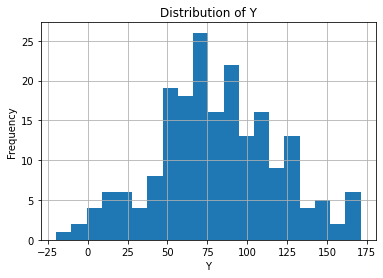

In [11]:
df.hist(column="Y", bins=20)
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.title("Distribution of Y")
plt.show()

In [16]:
X = df[['X1']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 635.5741202169636


In [19]:
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score}")

R² Score: 0.6062414559510207


In [20]:
df['Predicted_Y'] = model.predict(X)
df.to_csv("processed_data.csv", index=False)